In [1]:
k = 803

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_2D, WGAN_Model_2D


# Load data

In [3]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "sinus" #sinus, helix
n_instance = 1000
n_features = 2
n_var =int(vars[0,j])
latent_space = 100 #6
batchs = [10,100,1000]
BATCH_SIZE = 256 #100
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 1000 #100000
bias = [True,False]
use_bias = True

[2. 0. 0. 0. 0. 0.]


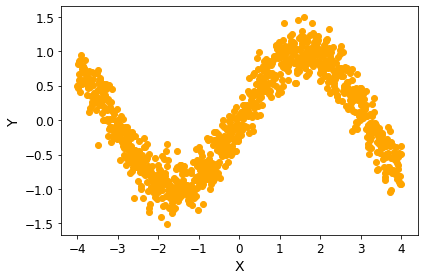

In [4]:
X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)

plt.scatter(X_train,y_train, c='orange', label='Sample Data')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# WGAN

### Architecture

In [6]:
generator=network_2D.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_2D.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                3030      
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [7]:
wgan = WGAN_Model_2D.WGAN(k,n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 3672      
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 6,233
Trainable params: 6,133
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [8]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (256, 2)
data shape_2 (256, 2)
data shape_3 (256, 2)
data shape_4 (232, 2)
Cycles:  4
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


In [9]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (256, 2)
train_dataset (256, 2)
train_dataset (256, 2)
train_dataset (232, 2)


## Training

Epoch 1/1000
critic: 12.825457 - generator: 0.067479 - 17s
Epoch 2/1000
critic: 4.079927 - generator: 0.044678 - 0s
Epoch 3/1000
critic: 1.161229 - generator: 0.028887 - 0s
Epoch 4/1000
critic: 0.562895 - generator: 0.022471 - 0s
Epoch 5/1000
critic: 0.089782 - generator: 0.022289 - 0s
Epoch 6/1000
critic: 0.081121 - generator: 0.025869 - 0s
Epoch 7/1000
critic: 0.079161 - generator: 0.027019 - 0s
Epoch 8/1000
critic: 0.028132 - generator: 0.028092 - 0s
Epoch 9/1000
critic: 0.017870 - generator: 0.029240 - 0s
Epoch 10/1000
critic: 0.021359 - generator: 0.030564 - 0s
Epoch 11/1000
critic: 0.017368 - generator: 0.030309 - 0s
Epoch 12/1000
critic: 0.017488 - generator: 0.029515 - 0s
Epoch 13/1000
critic: 0.006181 - generator: 0.028850 - 0s
Epoch 14/1000
critic: 0.014006 - generator: 0.030257 - 0s
Epoch 15/1000
critic: 0.003252 - generator: 0.028774 - 0s
Epoch 16/1000
critic: 0.010520 - generator: 0.027877 - 0s
Epoch 17/1000
critic: 0.036697 - generator: 0.027593 - 0s
Epoch 18/1000
critic:

critic: 0.004673 - generator: 0.033773 - 0s
Epoch 142/1000
critic: -0.000883 - generator: 0.033602 - 0s
Epoch 143/1000
critic: -0.001847 - generator: 0.033558 - 0s
Epoch 144/1000
critic: -0.005082 - generator: 0.032248 - 0s
Epoch 145/1000
critic: -0.000379 - generator: 0.033627 - 0s
Epoch 146/1000
critic: -0.002496 - generator: 0.032592 - 1s
Epoch 147/1000
critic: -0.005781 - generator: 0.032162 - 0s
Epoch 148/1000
critic: -0.003253 - generator: 0.034435 - 0s
Epoch 149/1000
critic: 0.005759 - generator: 0.034434 - 0s
Epoch 150/1000
critic: -0.004994 - generator: 0.033531 - 0s
Epoch 151/1000
critic: -0.002287 - generator: 0.033678 - 0s
Epoch 152/1000
critic: -0.004070 - generator: 0.032978 - 0s
Epoch 153/1000
critic: -0.002930 - generator: 0.032586 - 0s
Epoch 154/1000
critic: -0.001037 - generator: 0.032641 - 0s
Epoch 155/1000
critic: 0.001186 - generator: 0.032498 - 0s
Epoch 156/1000
critic: -0.007395 - generator: 0.032707 - 0s
Epoch 157/1000
critic: 0.000688 - generator: 0.033271 - 0s

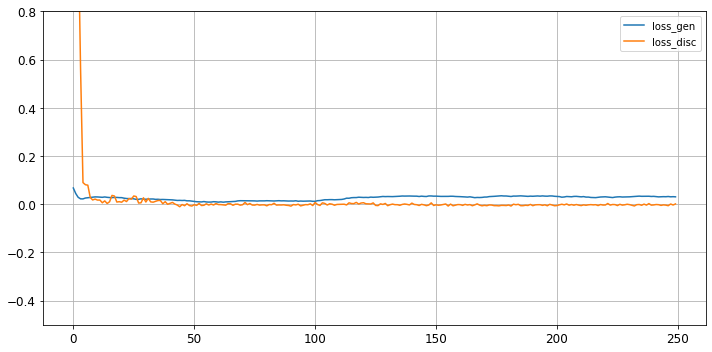

Predicted Values: (1000, 2)
save latent space


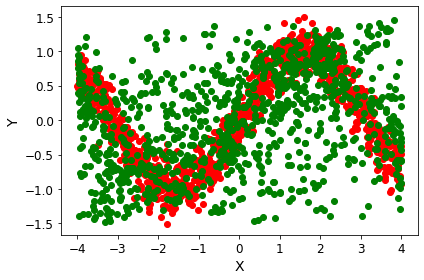

save countour line


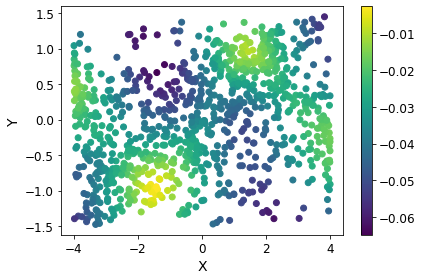

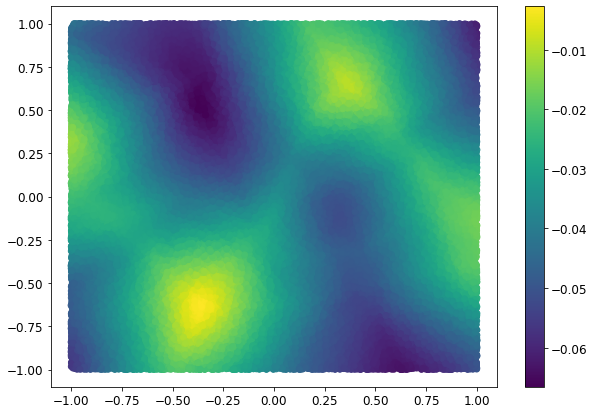

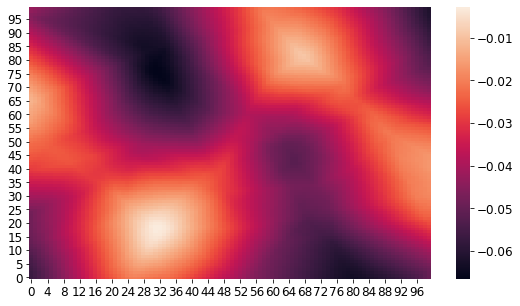

Epoch 251/1000
critic: -0.004771 - generator: 0.030504 - 0s
Epoch 252/1000
critic: -0.002919 - generator: 0.031743 - 0s
Epoch 253/1000
critic: 0.003163 - generator: 0.030907 - 0s
Epoch 254/1000
critic: -0.003980 - generator: 0.030438 - 0s
Epoch 255/1000
critic: -0.003946 - generator: 0.031357 - 0s
Epoch 256/1000
critic: -0.006024 - generator: 0.030804 - 0s
Epoch 257/1000
critic: -0.002200 - generator: 0.031081 - 0s
Epoch 258/1000
critic: -0.004123 - generator: 0.031161 - 0s
Epoch 259/1000
critic: -0.001451 - generator: 0.030779 - 1s
Epoch 260/1000
critic: -0.005143 - generator: 0.030170 - 0s
Epoch 261/1000
critic: -0.004433 - generator: 0.031614 - 0s
Epoch 262/1000
critic: -0.004122 - generator: 0.031215 - 0s
Epoch 263/1000
critic: -0.002984 - generator: 0.029880 - 0s
Epoch 264/1000
critic: 0.000749 - generator: 0.030348 - 0s
Epoch 265/1000
critic: -0.000601 - generator: 0.031068 - 0s
Epoch 266/1000
critic: -0.005640 - generator: 0.030333 - 0s
Epoch 267/1000
critic: -0.000388 - generat

critic: -0.000419 - generator: 0.028798 - 0s
Epoch 389/1000
critic: 0.000518 - generator: 0.028211 - 0s
Epoch 390/1000
critic: -0.000324 - generator: 0.028083 - 0s
Epoch 391/1000
critic: -0.000430 - generator: 0.028378 - 0s
Epoch 392/1000
critic: -0.001149 - generator: 0.027228 - 0s
Epoch 393/1000
critic: -0.001330 - generator: 0.028963 - 0s
Epoch 394/1000
critic: -0.000123 - generator: 0.028565 - 0s
Epoch 395/1000
critic: -0.000144 - generator: 0.028018 - 0s
Epoch 396/1000
critic: -0.000707 - generator: 0.027190 - 0s
Epoch 397/1000
critic: -0.000961 - generator: 0.027765 - 0s
Epoch 398/1000
critic: 0.000375 - generator: 0.026341 - 0s
Epoch 399/1000
critic: -0.000144 - generator: 0.024652 - 0s
Epoch 400/1000
critic: 0.002406 - generator: 0.025154 - 0s
Epoch 401/1000
critic: 0.000657 - generator: 0.026635 - 0s
Epoch 402/1000
critic: -0.000474 - generator: 0.027715 - 0s
Epoch 403/1000
critic: -0.000113 - generator: 0.027635 - 0s
Epoch 404/1000
critic: 0.000675 - generator: 0.027706 - 0s


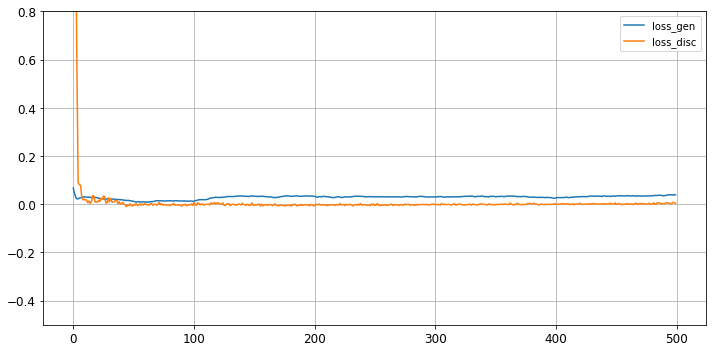

Predicted Values: (1000, 2)
save latent space


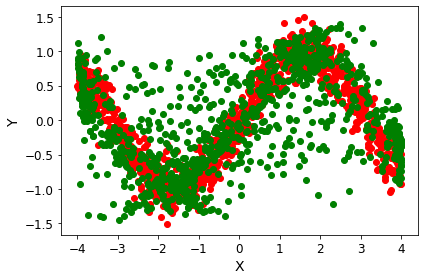

save countour line


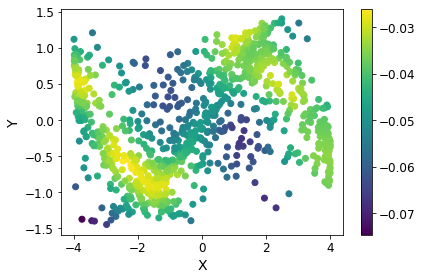

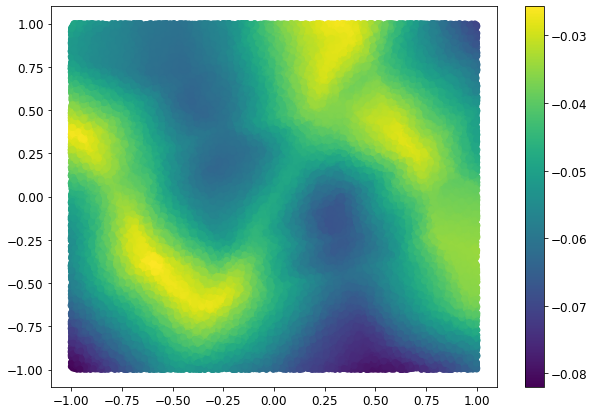

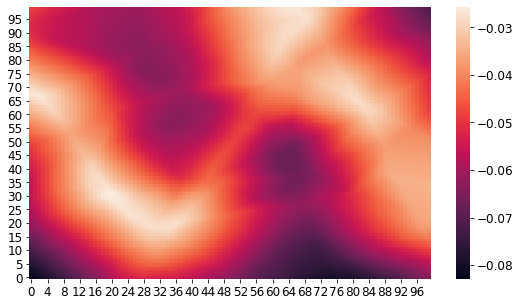

Epoch 501/1000
critic: 0.000848 - generator: 0.040014 - 0s
Epoch 502/1000
critic: 0.001037 - generator: 0.040559 - 0s
Epoch 503/1000
critic: 0.006428 - generator: 0.040187 - 0s
Epoch 504/1000
critic: 0.001152 - generator: 0.041377 - 0s
Epoch 505/1000
critic: 0.005262 - generator: 0.040576 - 0s
Epoch 506/1000
critic: 0.005441 - generator: 0.041199 - 0s
Epoch 507/1000
critic: 0.004210 - generator: 0.042261 - 0s
Epoch 508/1000
critic: 0.000453 - generator: 0.042144 - 0s
Epoch 509/1000
critic: 0.000266 - generator: 0.042468 - 0s
Epoch 510/1000
critic: 0.001883 - generator: 0.041943 - 0s
Epoch 511/1000
critic: 0.002468 - generator: 0.043096 - 0s
Epoch 512/1000
critic: 0.001430 - generator: 0.042854 - 0s
Epoch 513/1000
critic: 0.002262 - generator: 0.044054 - 0s
Epoch 514/1000
critic: 0.001889 - generator: 0.044274 - 0s
Epoch 515/1000
critic: 0.004757 - generator: 0.044683 - 0s
Epoch 516/1000
critic: -0.001557 - generator: 0.043735 - 0s
Epoch 517/1000
critic: 0.005639 - generator: 0.042951 -

critic: 0.006565 - generator: 0.055164 - 0s
Epoch 641/1000
critic: 0.005914 - generator: 0.055978 - 0s
Epoch 642/1000
critic: 0.001778 - generator: 0.055867 - 0s
Epoch 643/1000
critic: 0.002941 - generator: 0.056299 - 0s
Epoch 644/1000
critic: 0.002301 - generator: 0.056603 - 0s
Epoch 645/1000
critic: 0.004604 - generator: 0.057230 - 0s
Epoch 646/1000
critic: 0.004816 - generator: 0.056629 - 0s
Epoch 647/1000
critic: 0.004333 - generator: 0.056818 - 0s
Epoch 648/1000
critic: 0.005588 - generator: 0.057080 - 0s
Epoch 649/1000
critic: 0.004567 - generator: 0.058294 - 0s
Epoch 650/1000
critic: 0.007707 - generator: 0.057525 - 0s
Epoch 651/1000
critic: 0.002941 - generator: 0.058243 - 0s
Epoch 652/1000
critic: 0.006610 - generator: 0.057794 - 0s
Epoch 653/1000
critic: 0.002434 - generator: 0.057270 - 0s
Epoch 654/1000
critic: 0.003095 - generator: 0.058268 - 0s
Epoch 655/1000
critic: 0.006863 - generator: 0.058987 - 0s
Epoch 656/1000
critic: 0.005394 - generator: 0.058962 - 0s
Epoch 657/10

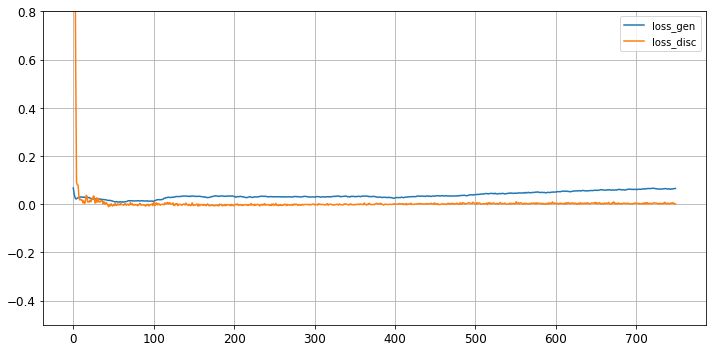

Predicted Values: (1000, 2)
save latent space


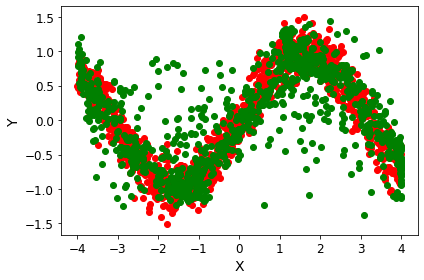

save countour line


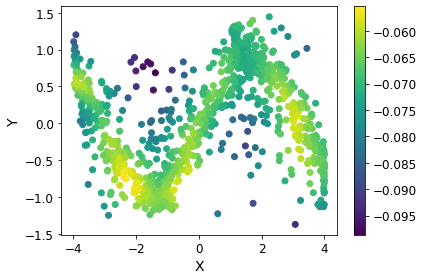

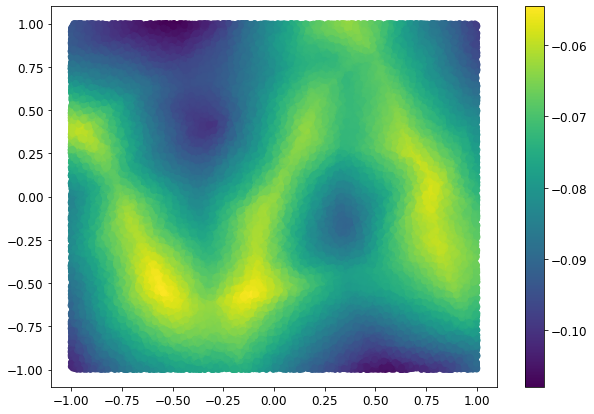

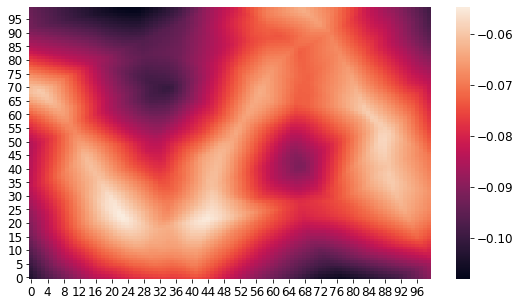

Epoch 751/1000
critic: 0.002617 - generator: 0.064889 - 0s
Epoch 752/1000
critic: 0.003844 - generator: 0.063366 - 0s
Epoch 753/1000
critic: 0.003153 - generator: 0.064173 - 0s
Epoch 754/1000
critic: 0.006106 - generator: 0.064990 - 0s
Epoch 755/1000
critic: 0.005579 - generator: 0.065462 - 0s
Epoch 756/1000
critic: 0.006596 - generator: 0.065044 - 0s
Epoch 757/1000
critic: 0.001084 - generator: 0.064734 - 0s
Epoch 758/1000
critic: 0.003728 - generator: 0.064190 - 0s
Epoch 759/1000
critic: 0.001828 - generator: 0.065220 - 0s
Epoch 760/1000
critic: 0.004436 - generator: 0.065519 - 0s
Epoch 761/1000
critic: 0.004022 - generator: 0.066647 - 0s
Epoch 762/1000
critic: 0.001901 - generator: 0.066267 - 0s
Epoch 763/1000
critic: 0.001083 - generator: 0.066538 - 0s
Epoch 764/1000
critic: 0.005105 - generator: 0.066602 - 0s
Epoch 765/1000
critic: 0.002225 - generator: 0.065869 - 0s
Epoch 766/1000
critic: 0.004990 - generator: 0.066058 - 0s
Epoch 767/1000
critic: 0.004520 - generator: 0.066149 - 

critic: 0.007719 - generator: 0.077036 - 0s
Epoch 891/1000
critic: 0.006382 - generator: 0.078773 - 0s
Epoch 892/1000
critic: 0.011778 - generator: 0.078391 - 0s
Epoch 893/1000
critic: 0.003495 - generator: 0.078703 - 0s
Epoch 894/1000
critic: 0.005673 - generator: 0.078794 - 0s
Epoch 895/1000
critic: 0.003887 - generator: 0.078643 - 0s
Epoch 896/1000
critic: 0.006492 - generator: 0.078926 - 0s
Epoch 897/1000
critic: 0.003837 - generator: 0.076274 - 0s
Epoch 898/1000
critic: 0.004407 - generator: 0.075518 - 0s
Epoch 899/1000
critic: 0.003883 - generator: 0.075962 - 0s
Epoch 900/1000
critic: 0.003499 - generator: 0.076650 - 0s
Epoch 901/1000
critic: 0.003358 - generator: 0.075554 - 0s
Epoch 902/1000
critic: 0.003839 - generator: 0.075190 - 0s
Epoch 903/1000
critic: 0.002814 - generator: 0.075662 - 0s
Epoch 904/1000
critic: 0.002526 - generator: 0.075824 - 0s
Epoch 905/1000
critic: 0.003716 - generator: 0.077646 - 0s
Epoch 906/1000
critic: 0.003677 - generator: 0.076358 - 0s
Epoch 907/10

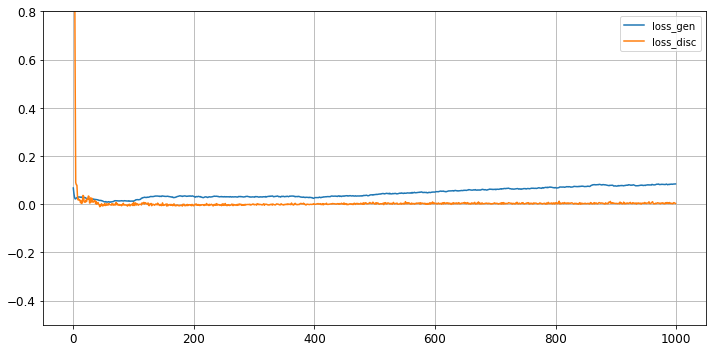

Predicted Values: (1000, 2)
save latent space


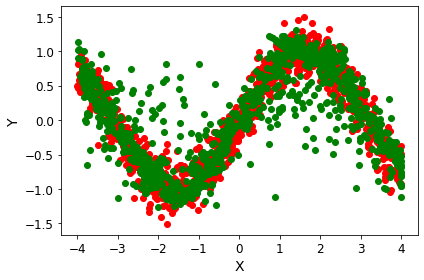

save countour line


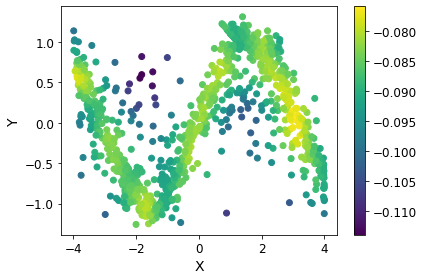

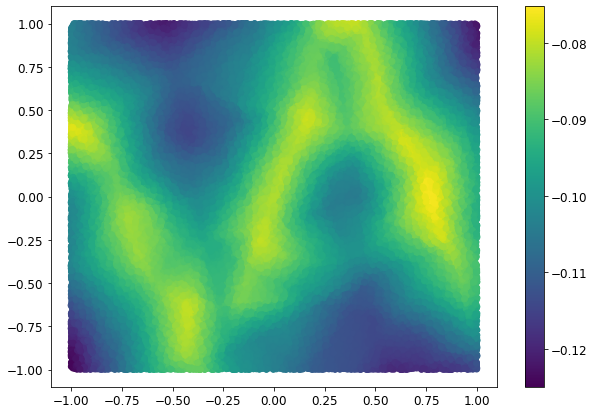

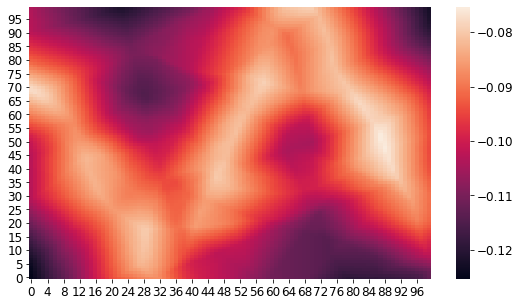

In [10]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

#### plot loss

In [11]:
k=k
epoch = 500

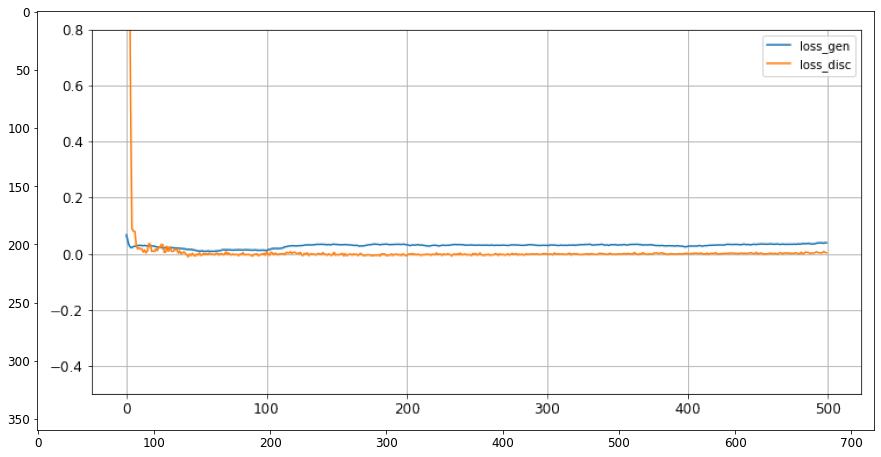

In [12]:
from PIL import Image

#Discriminator Loss
loss = Image.open('GANS/Losses/GANS_loss_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

### Sampleing from the latent space

In [13]:
generator = keras.models.load_model('GANS/Models/generator_v'+str(k)+'_epochs_'+str(epoch))

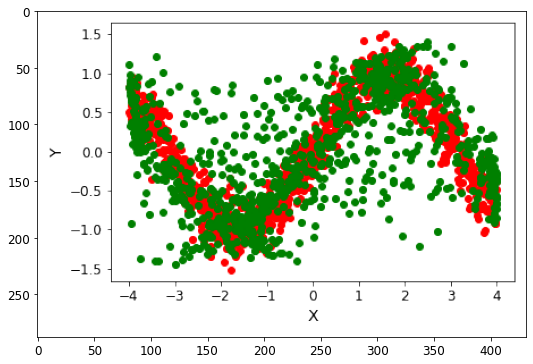

In [14]:
result = Image.open('GANS/Result/Latent/v_'+str(k)+'_epochs_'+str(epoch)+'.png')
plt.figure("Latent Space",figsize=[10,6])
plt.imshow(result)

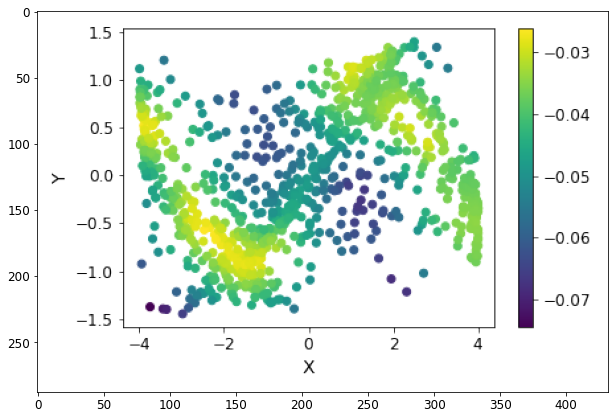

In [15]:
countour_line = Image.open('GANS/Result/'+'countour_points_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Line",figsize=[18,7])
plt.imshow(countour_line)

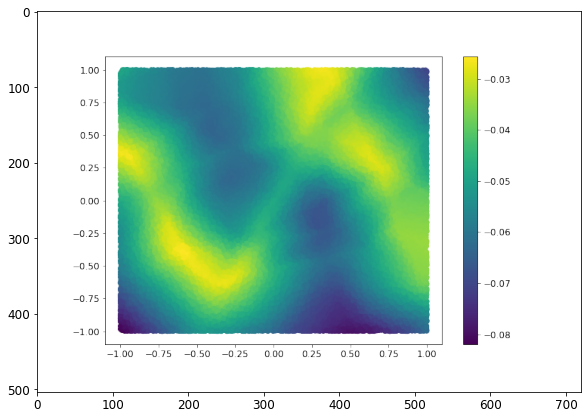

In [16]:
countour_mesh = Image.open('GANS/Result/'+'countour_mesh_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Mesh",figsize=[18,7])
plt.imshow(countour_mesh)

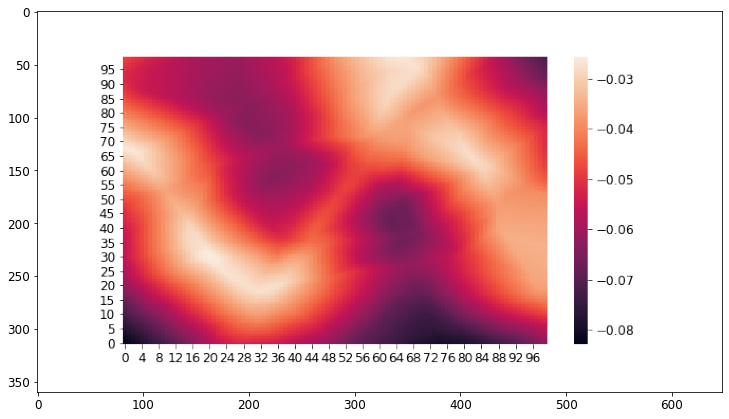

In [17]:
heatmap = Image.open('GANS/Result/'+'heatmap_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Mesh",figsize=[18,7])
plt.imshow(heatmap)


### Applying the prediction function

## Fixed Input

predict1 (100, 2)
predictthis (900, 2)
input_test : (900, 2)


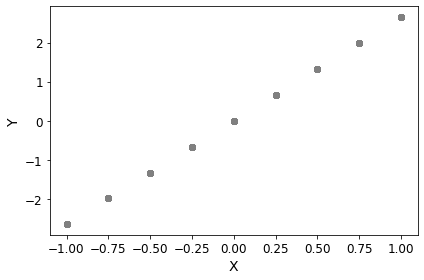

In [18]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

print("predict1",predict1.shape)
predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
print("predictthis",predictthis.shape)

predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [19]:
X_generated = wgan.predict(input_test, scaler) #wagn.predict

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

Generated Data: (899, 2)


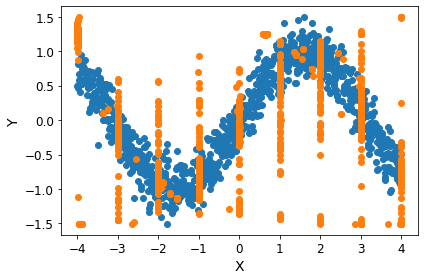

In [20]:
print("Generated Data:",X_generated.shape)

plt.scatter(X_train, y_train,label="Sample Data")
plt.scatter(X_generated[:,0],X_generated[:,1])
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()